# Visualization for Overview

## Attributes to Measure Efficiency of the Visualization

Let's use Radar Chart with 4~6 axis

4~6 attributes 
1. time
2. # of fixations
3. avg fix duration
4. scan path
5. area of convex hull
6. avg pupil dilation
7. # of clicks

*all in average(mean) for the group of participants*


### Data needed for each participant

- [x] time
  - time on task
    - from `Others/participant_data.js`


- [ ] # of fixations
  - last fixation's serial number
- [ ] avg fix duration
  - calculate average durations
    - fixation data from `Raw_Data/p1/p1.treeFXD.txt, Raw_Data/p1/p1.graphFXD.txt, Raw_Data/p2/p2.treeFXD.txt, Raw_Data/p2/p2.graphFXD.txt, ...`
  
- [ ] scan path
  - calculate saccadic length between each fixations
  - add all saccadic length up
- [ ] avg saccadic length
  - get avg of all saccadic length
      - fixation data from `Raw_Data/... p1/p1.treeFXD.txt, p1/p1.graphFXD.txt, p2/p2.treeFXD.txt, p2/p2.graphFXD.txt, ...`

- [ ] avg pupil dilation
  - [ ] avg baseline (b/c of different base pupil sizes depend on ppl's eyes and conditions)
    - baseline data from `Raw_Data/p1/p1GZD.txt, Raw_Data/p2/p2GZD.txt, ...`
  - [ ] avg left, right pupil size throughout the task
    - gaze data from `filtered_data/... p1/p1treeGZD.js, p1/p1graphGZD.js, p2/p1treeGZD.js, ...`
  
- [ ] area of convex hull
  - calculate it using [scipy.spatial.ConvexHull](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html)
    - fixation from `Raw_Data/... p1/p1.treeFXD.txt, p1/p1.graphFXD.txt, p2/p2.treeFXD.txt, p2/p2.graphFXD.txt, ...`
  
- [ ] # of clicks
  - count the total 'LMouseButton' events
    - event data from `Raw_Data/... p1/p1.treeEVD.txt, p1/p1.graphEVD.txt, p2/p2.treeEVD.txt, p2/p2.graphEVD.txt, ...`
    

### Final output planned

1. overview_participant.csv
```
pid,ont_type,vis_type,session_type,time,success,totalfix,avg_fix_duration,scanpath,avg_saccadic_length,avg_pupil_dilation,convexhull_area,totalclick
p1,1,1,1,26,0.608695652,2647,140,10000,20,1.2,1000,606
p1,2,2,4,38,0.52173913,2422,200,20000,10,2.0,1200,984
p2,1,2,3,19,0.347826087,2581,,,,,,416
p2,2,1,2,25,0.391304348,1166,,,,,,371
p3,1,1,1,10,0.47826087,1564,,,,,,173
p3,2,2,4,50,0.391304348,7967,,,,,,891
p4,1,2,3,12,0.391304348,590,,,,,,235
p4,2,1,2,9,0.52173913,605,,,,,,254
```
2. overview_combined.csv
```
sessionID,ont_type,vis_type,m_time,m_success,m_totalfix,m_avg_fix_duration,m_scanpath,m_avg_saccadic_length,m_avg_pupil_dilation,m_convexhull_area,m_totalclick
1,general,tree,18,0.5,2000,,,,,,490
2,expert,tree,17,0.45,850,,,,,,310
3,general,graph,15.5,0.37,1500,,,,,,300
4,expert,graph,44,0.45,5000,,,,,,930
```

#### Field info

ontology type:
1. general
2. expert

visualization type:
1. tree
2. graph

session type:
1. general - tree
3. expert - tree
2. general - graph
4. expert - graph


## Import libraries

In [4]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [11]:
session_df = pd.read_json ('tweakedData/participant_data.json')
session_df.head(5)

,Ontology,P_ID,Session_Type,Task_Success,Time_On_Task,Visualization
0,1,p1,1,0.608696,26,1
1,2,p1,4,0.521739,38,2
2,1,p3,1,0.478261,10,1
3,2,p3,4,0.391304,50,2
4,1,p5,1,0.521739,22,1


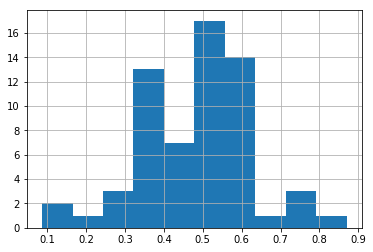

In [20]:
session_df['Task_Success'].hist();